# This notebook uses the Keweenawan track to demonstrate the inversion package with a case study of 1.1 Ga North American APWP

In [1]:
from bayesian_pep import *
import pandas as pd
import seaborn as sns
# theano.config.floatX = 'float64'

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
d2r = np.pi/180
r2d = 180/np.pi
eps = 1.e-6

In [4]:
def plot_paleomagnetic_poles(dataframe, pole_lon = 'pole_lon', pole_lat = 'pole_lat', pole_a95 = 'pole_a95', 
                             pole_age = 'pole_age', central_longitude=0, central_latitude=0, cmap = 'viridis_r', **kwargs):
    ax = ipmag.make_orthographic_map(central_longitude, central_latitude, **kwargs)

    ax.set_global()
    ax.gridlines()
    
    cNorm  = matplotlib.colors.Normalize(vmin=min(dataframe[pole_age]), vmax=max(dataframe[pole_age]))
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)

    dataframe['color'] = [colors.rgb2hex(scalarMap.to_rgba(dataframe[pole_age].tolist()[i])) for i in range(dataframe.shape[0])]

    for i in range(dataframe .shape[0]):
        this_pole = Pole(dataframe[pole_lon][i], dataframe[pole_lat][i], A95 = dataframe[pole_a95][i])
        this_pole.plot(ax, color = dataframe['color'][i])
        
    cbar = plt.colorbar(scalarMap, shrink=0.85)
    cbar.ax.set_xlabel('Age (Ma)', fontsize=12) 
    return ax

## Load Keweenawan Track data

In [5]:
Kewee_poles = pd.read_csv('data/Keweenawan_poles/keweenawan_pole_means.csv')
Kewee_poles = Kewee_poles.sort_values(by='AgeNominal', ascending=0, ignore_index=1)
Kewee_poles

,Polarity,PoleName,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,PmagRef,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,color
0,MP_lowerR1,Mamainse lower reversed 1,47.10,275.29,49.5,227.0,5.3,31.7,24,Alona Bay reversed-polarity zone,"Swanson-Hysell, 2014a",1109.00,1106.00,1112.00,Likely older than ca. 1105 Ma given distinct h...,NaN,NaN,uniform,7.0,#930E26
1,Osler_R1,Osler reverse (lower),48.80,272.34,40.9,218.6,4.8,31.5,30,Alona Bay reversed-polarity zone,"Swanson-Hysell et al., 2014b",1108.00,1105.15,1110.00,Older than 1105.15 $\pm$ 0.33 Ma Osler_R2 pole...,"Davis and Sutcliffe, 1985; this study",NaN,uniform,7.0,#B82431
2,PM,Siemens Creek Volcanics,46.50,269.80,45.8,214.0,9.2,28.3,10,Alona Bay reversed-polarity zone,"Palmer and Halls, 1986",1108.00,1105.00,1111.00,Older than the $^{\mathrm{207}}$Pb/$^{\mathrm{...,"Davis and Green, 1997",NaN,uniform,6.0,#CD4F45
3,Grand Portage Basalts,Grand Portage Basalts,47.93,270.28,46.0,201.7,6.8,38.3,13,Alona Bay reversed-polarity zone,"Books, 1968; Tauxe and Kodama, 2009",1106.00,1105.28,1108.00,"Close to, but slightly older than, $^{\mathrm{...",this study,NaN,uniform,5.0,#E0785F
4,Osler_R2,Osler reverse (upper),48.59,271.81,42.3,203.4,3.7,24.4,64,Alona Bay reversed-polarity zone,"Halls, 1974; Swanson-Hysell et al., 2014b; thi...",1105.15,1104.82,1105.48,$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of...,this study,0.33,gaussian,7.0,#F2A07E
5,MP_lowerR2,Mamainse lower reversed 2,47.09,275.27,37.5,205.2,4.5,78.6,14,Alona Bay reversed-polarity zone,"Swanson-Hysell, 2014a",1105.00,1100.40,1109.00,Older than $^{\mathrm{206}}$Pb/$^{\mathrm{238}...,"Swanson-Hysell, 2014a",NaN,uniform,7.0,#F8C1A6
6,MP_lowerNupperR,Mamainse lower normal and upper reversed,47.07,275.26,36.1,189.7,4.9,37.3,24,Flour Bay normal and reversed polarity zones,"Swanson-Hysell, 2014a",1100.36,1100.10,1100.61,Age constrained by $^{\mathrm{206}}$Pb/$^{\mat...,"Swanson-Hysell, 2014a",0.25,gaussian,7.0,#6A579A
7,NSVG_nswu,North Shore Volcanic Group (upper SW sequence),47.20,268.50,36.9,179.3,2.1,56.8,78,Portage Lake normal-polarity zone,"Tauxe and Kodama, 2009; this study",1095.01,1094.20,1095.82,$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U dates o...,this study,0.81,gaussian,6.0,#154F8D
8,NSVG_nneu,North Shore Volcanic Group (upper NE sequence),47.61,269.23,31.1,181.7,4.2,42.2,28,Portage Lake normal-polarity zone,"Books, 1972; Tauxe and Kodama, 2009",1095.00,1092.00,1098.00,Younger than the $^{\mathrm{207}}$Pb/$^{\mathr...,"Davis and Green, 1997; Fairchild et al., 2017",NaN,uniform,6.0,#35474E
9,MP_upperN,Mamainse upper normal,47.06,275.25,31.2,183.2,2.5,94.4,34,Portage Lake normal-polarity zone,"Swanson-Hysell, 2014a",1094.00,1090.00,1100.00,Likely ca. 1094 Ma based on similar pole posit...,NaN,NaN,uniform,7.0,#3B7185


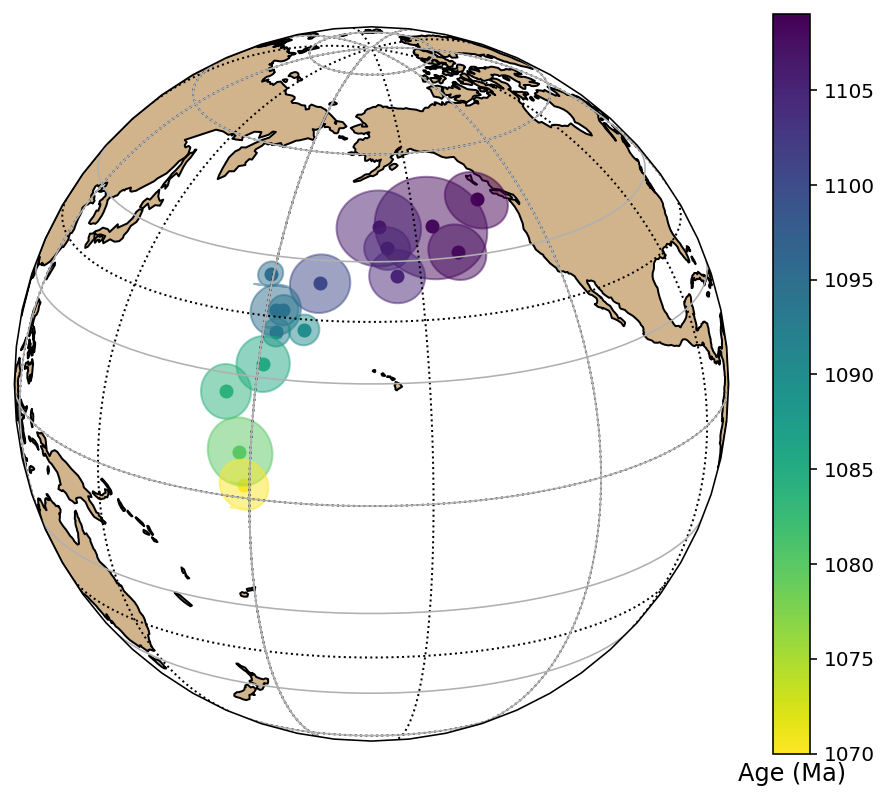

In [6]:
ax = plot_paleomagnetic_poles(Kewee_poles, 'PLon', 'PLat', 'A95', 'AgeNominal', central_longitude=200, central_latitude=20)

## tpw inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


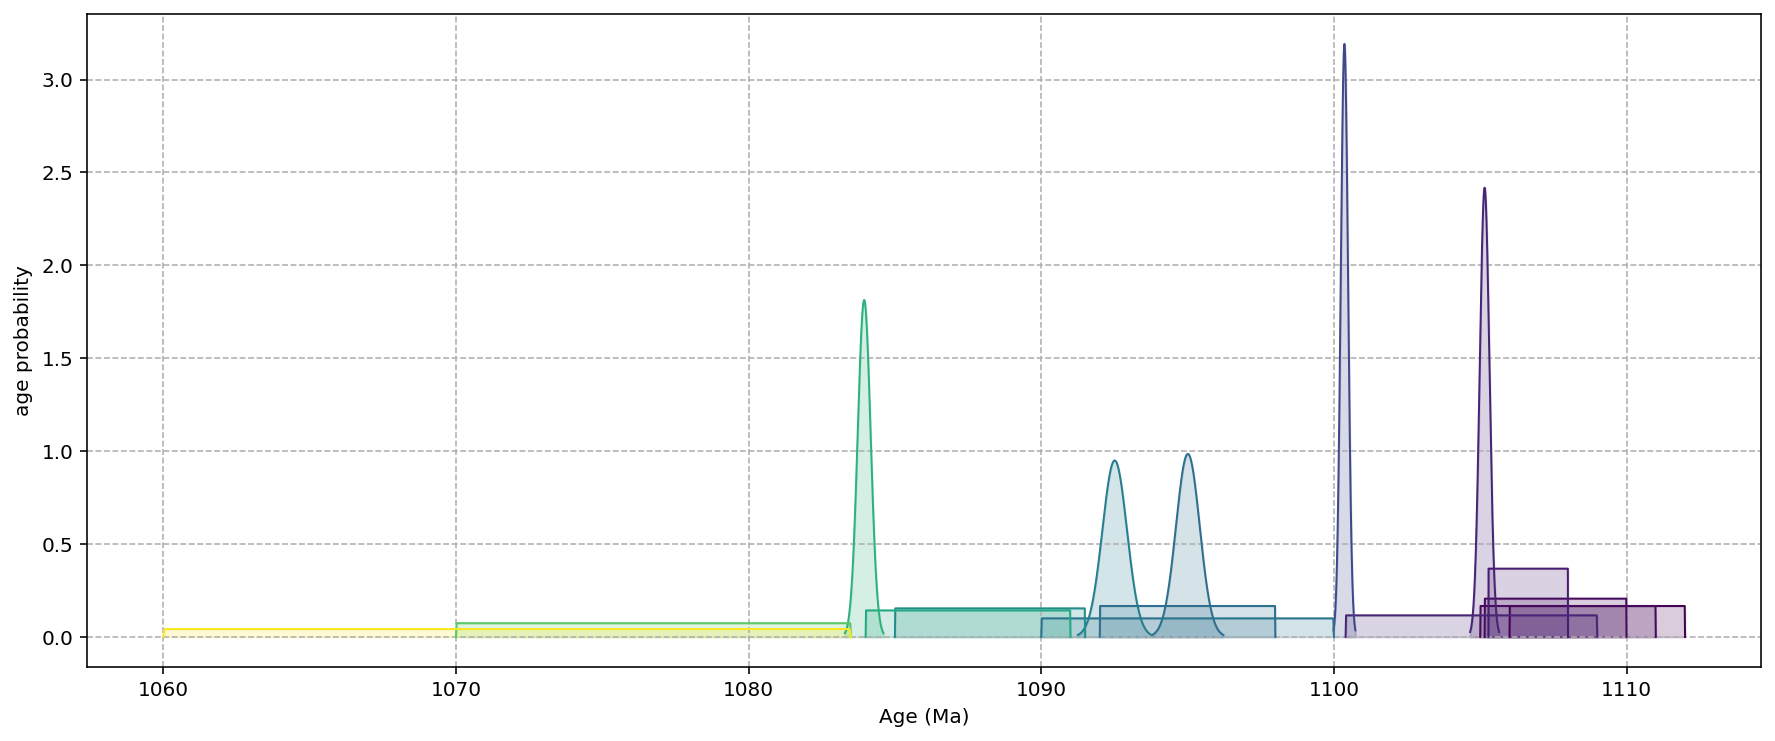

In [7]:
with pm.Model() as model:
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    tpw_angle = pm.Uniform('tpw_angle', 0., 360.) 
    tpw_rate = pm.Exponential('tpw_rate', 2.5) 
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i]/2)
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]/2

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_tpw(start, tpw_angle, tpw_rate, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    # trace_tpw = pm.sample(1000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [8]:
# pm.save_trace(trace_tpw, 'code_output/kewee_tpw_trace', overwrite=1)

In [9]:
trace_tpw_saved = pm.load_trace('code_output/kewee_tpw_trace', model)

In [10]:
# plt.figure(figsize=(10, 20))
# axes = pm.traceplot(trace_tpw_saved, compact=1)
# plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

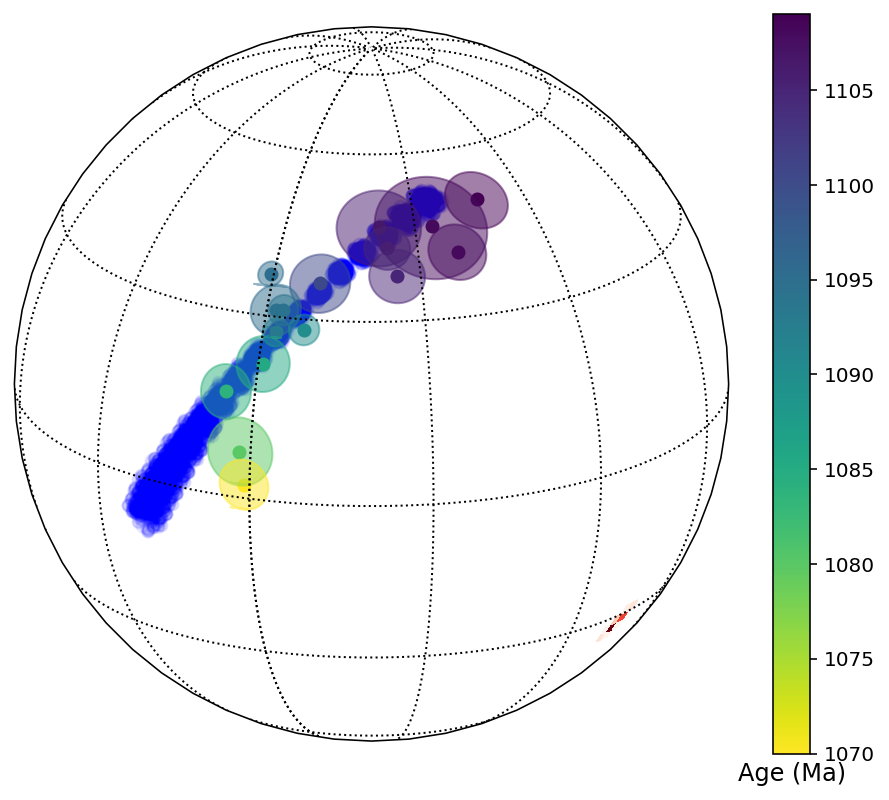

In [11]:
tpw_posterior_likelihood_list = plot_trace_tpw(trace_tpw_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 50, 
                  savefig = 0, scatter=1, posterior_n=1000, figname='code_output/kewee_tpw_inversion_poles.pdf')

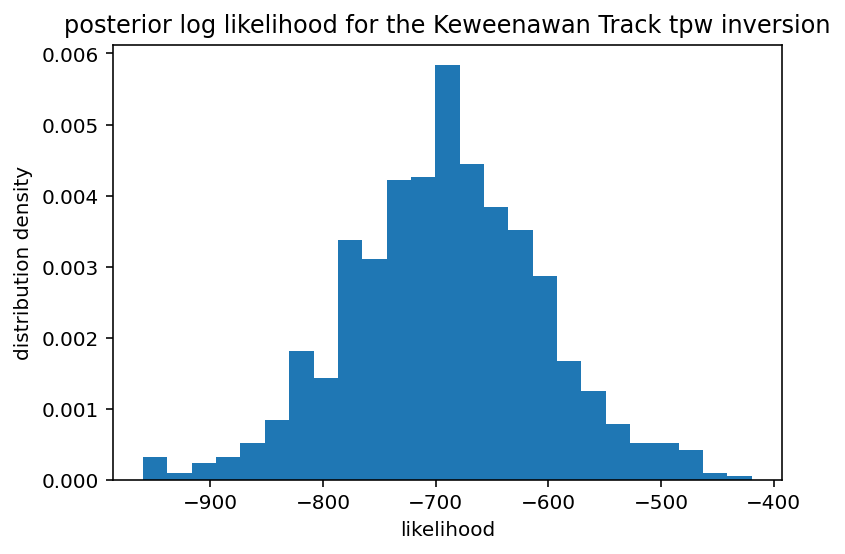

In [39]:
plt.hist(tpw_posterior_likelihood_list, density=1, bins=25)
plt.title('posterior log likelihood for the Keweenawan Track tpw inversion')
plt.ylabel('distribution density')
plt.xlabel('likelihood')
plt.show()

## 1 euler pole inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


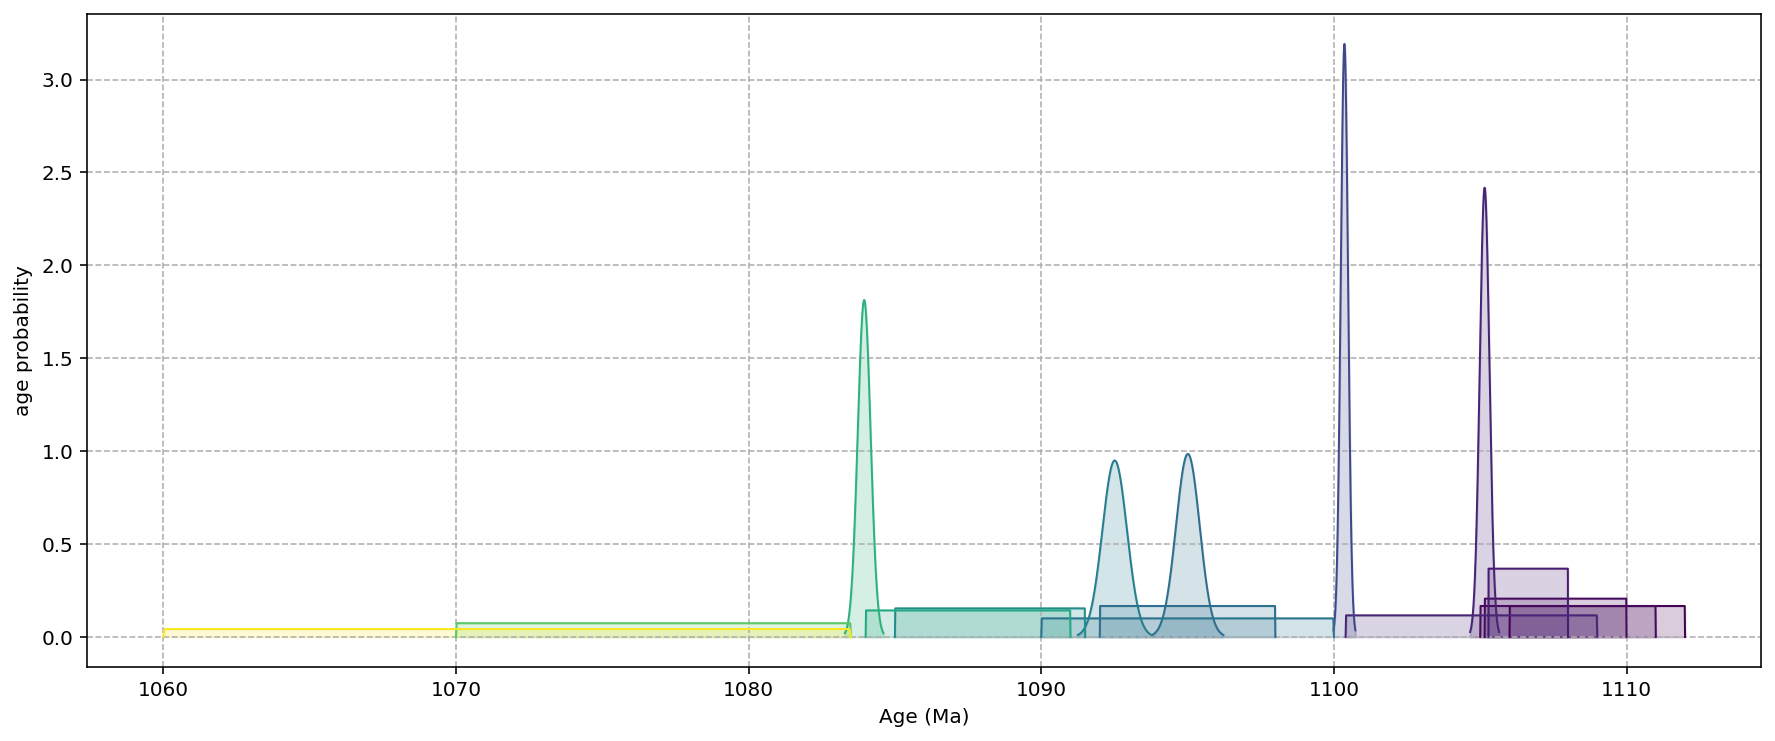

In [13]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([1., 1.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array([1., 1.]), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i]/2)
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]/2

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_1e(start, euler_1, rate_1, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    # trace_1e = pm.sample(2000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [14]:
# pm.save_trace(trace_1e, 'code_output/kewee_1_euler_trace', overwrite=1)

In [15]:
trace_1e_saved = pm.load_trace('code_output/kewee_1_euler_trace', model)

In [16]:
# plt.figure(figsize=(10, 20))
# axes = pm.traceplot(trace_1e_saved, compact=1)
# plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

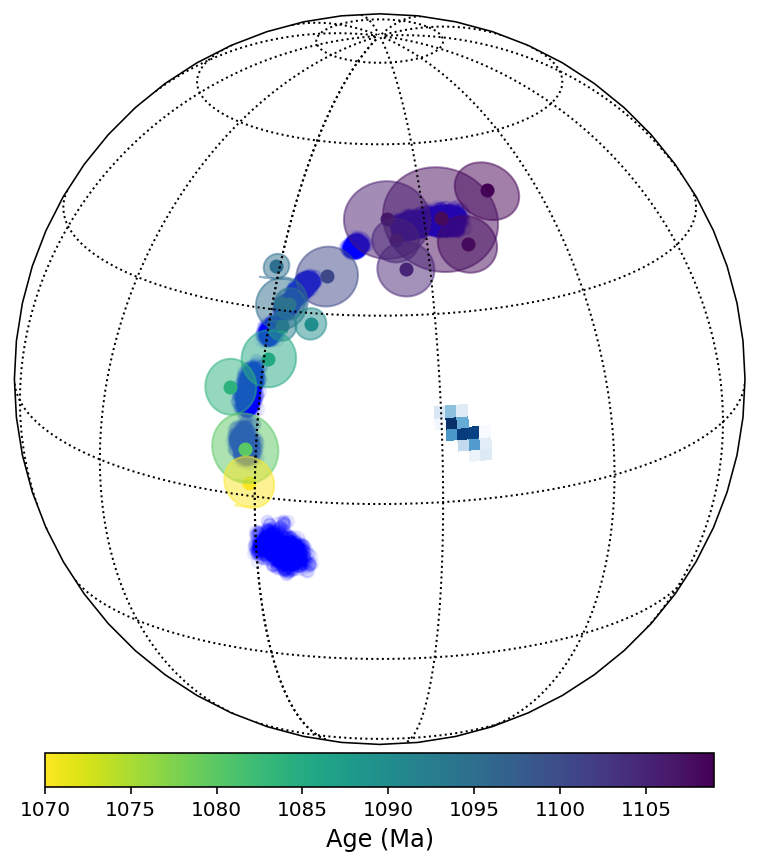

In [17]:
ax, one_euler_posterior_likelihood_list = plot_trace_1e(trace_1e_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 100, 
                  savefig = 0, scatter=1, posterior_n=1000, figname='code_output/kewee_1_Euler_inversion_.pdf', cmap='Blues')

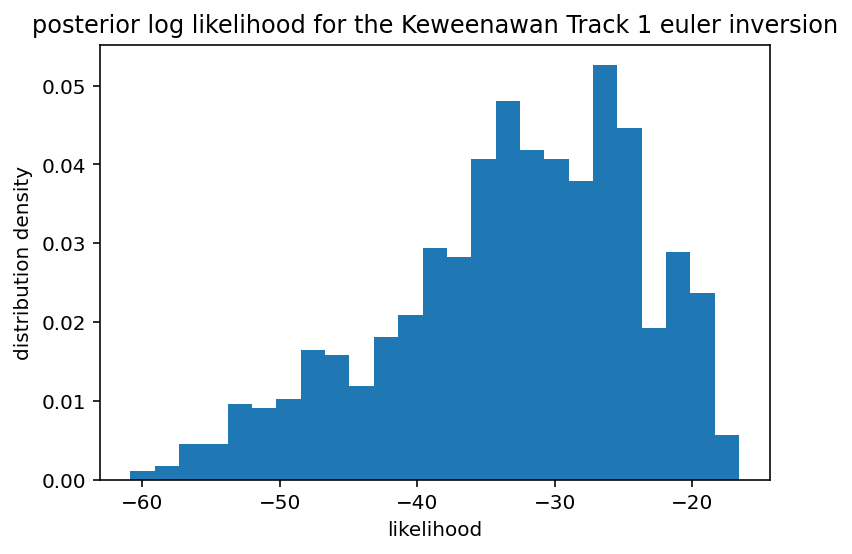

In [40]:
plt.hist(one_euler_posterior_likelihood_list, density=1, bins=25)
plt.title('posterior log likelihood for the Keweenawan Track 1 euler inversion')
plt.ylabel('distribution density')
plt.xlabel('likelihood')
plt.show()

## 2 euler pole inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


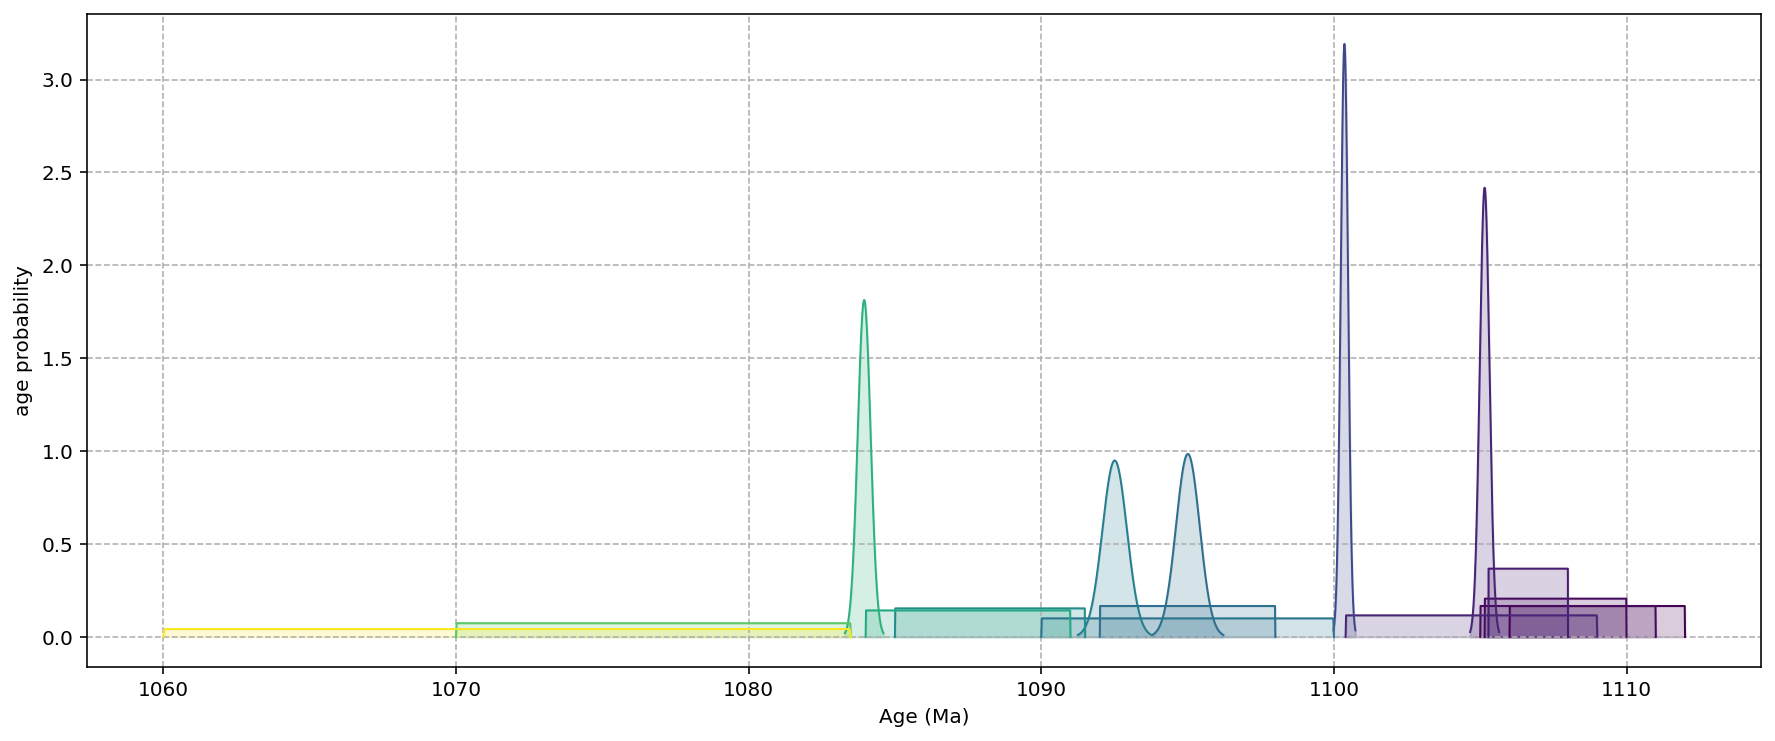

In [19]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    euler_2 = Watson_Girdle('euler_2', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_2 = pm.Uniform('rate_2', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    switchpoint = pm.Uniform('switchpoint', Kewee_poles['AgeNominal'].min(), Kewee_poles['AgeNominal'].max())
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i]/2)
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]/2

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_2e(start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    # trace_2e = pm.sample(50000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [20]:
# pm.save_trace(trace_2e, 'code_output/kewee_2_euler_trace', overwrite=1)

In [21]:
trace_2e_saved = pm.load_trace('code_output/kewee_2_euler_trace', model)

In [22]:
trace_2e_saved = trace_2e_saved[15000:]

In [23]:
# plt.figure(figsize=(10, 20))
# axes = pm.traceplot(trace_2e_saved, compact=1)
# plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

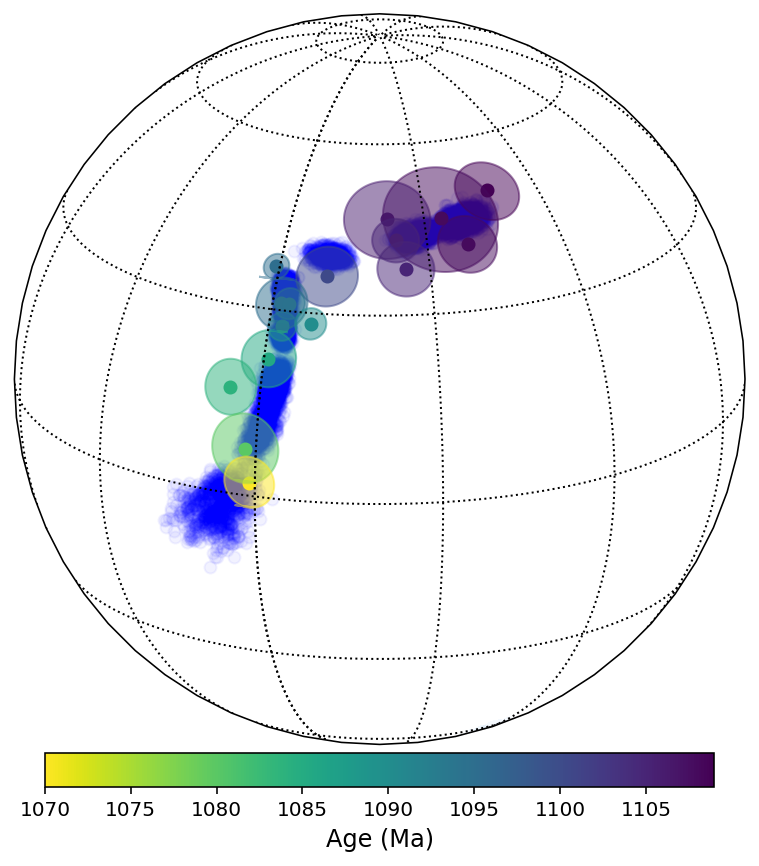

In [24]:
ax, two_euler_posterior_likelihood = plot_trace_2e(trace_2e_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(), 200, 20, 100, 
                  savefig = 1, scatter=1, posterior_n=1000, figname='code_output/kewee_2_Euler_inversion_.pdf');

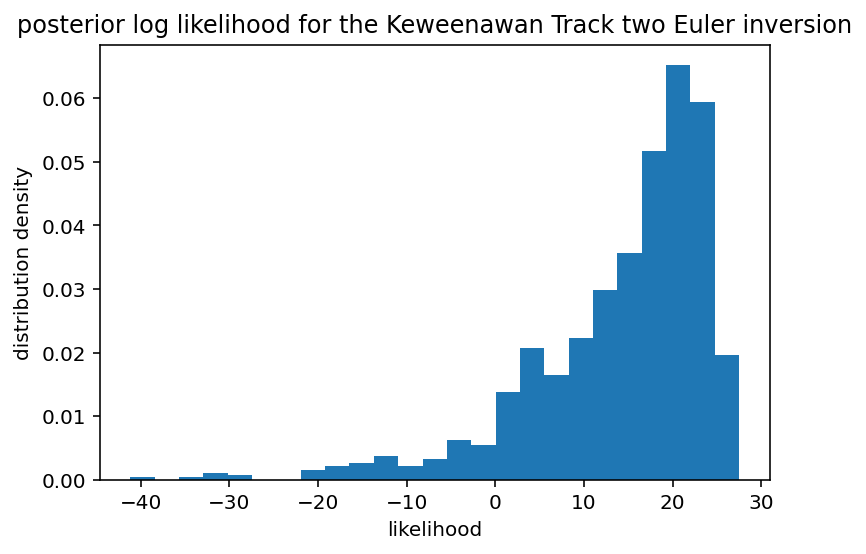

In [41]:
plt.hist(two_euler_posterior_likelihood, density=1, bins=25)
plt.title('posterior log likelihood for the Keweenawan Track two Euler inversion')
plt.ylabel('distribution density')
plt.xlabel('likelihood')
plt.show()

## 1 euler + tpw inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [t15]
>Metropolis: [t14]
>Metropolis: [t13]
>Metropolis: [t12]
>Metropolis: [t11]
>Metropolis: [t10]
>Metropolis: [t9]
>Metropolis: [t8]
>Metropolis: [t7]
>Metropolis: [t6]
>Metropolis: [t5]
>Metropolis: [t4]
>Metropolis: [t3]
>Metropolis: [t2]
>Metropolis: [t1]
>Metropolis: [t0]
>Metropolis: [tpw_rate]
>Metropolis: [tpw_angle]
>Metropolis: [start_pole]
>Metropolis: [start_pole_age]
>Metropolis: [rate_1]
>Metropolis: [euler_1]


Sampling 1 chain for 1_000 tune and 50_000 draw iterations (1_000 + 50_000 draws total) took 9354 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


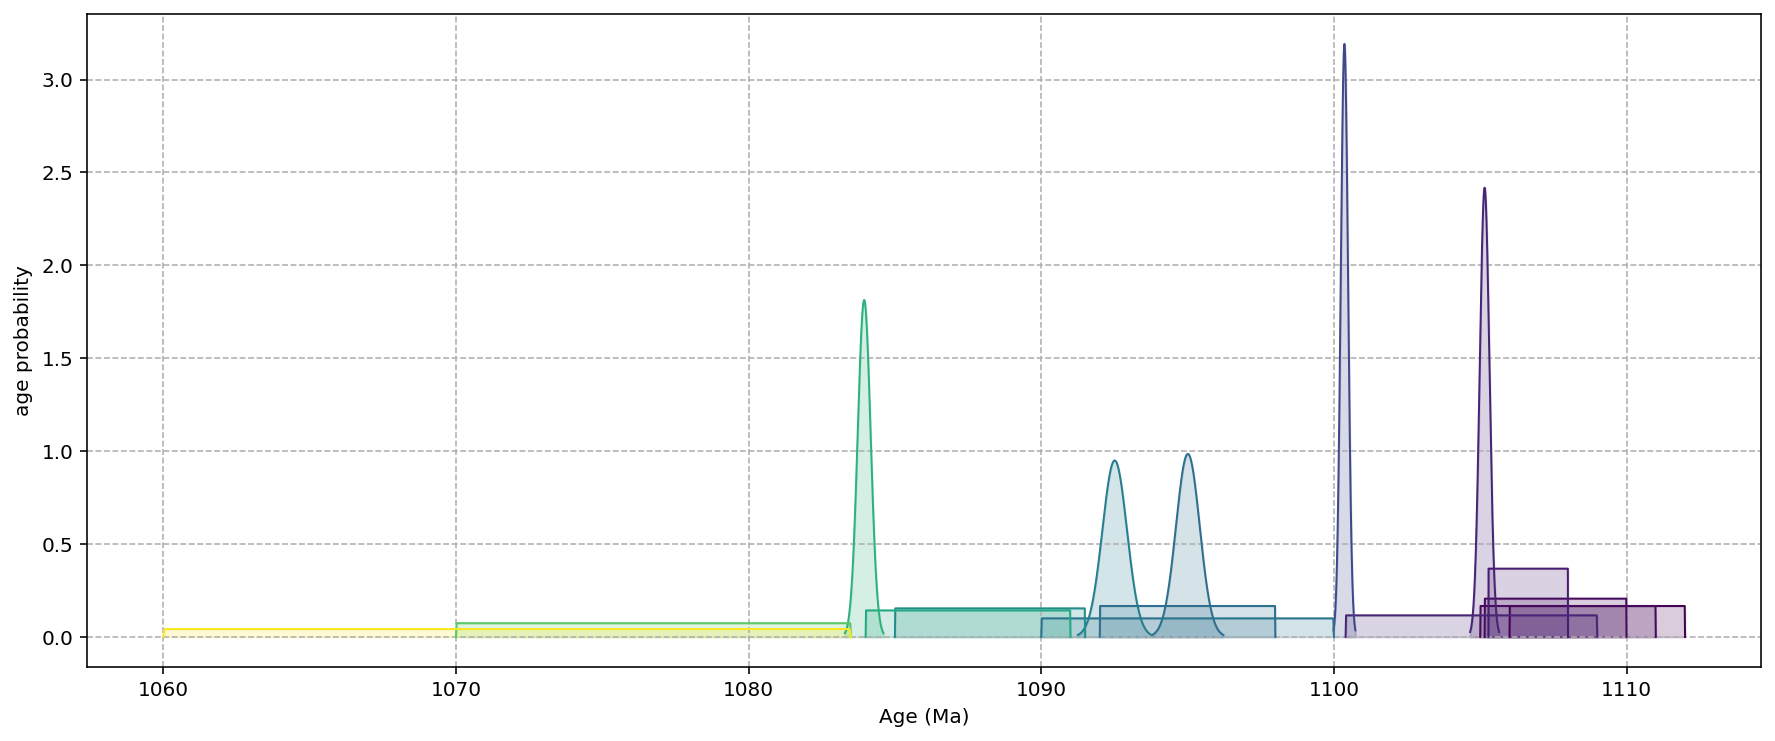

In [7]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    tpw_angle = pm.Uniform('tpw_angle', 0., 360.)
    tpw_rate = pm.Exponential('tpw_rate', 2.5)
    
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i]/2)
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]/2

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_1e_tpw(start, euler_1, rate_1, tpw_angle, tpw_rate, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    trace_1e_tpw = pm.sample(50000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [8]:
pm.save_trace(trace_1e_tpw, 'code_output/kewee_1_euler_tpw_trace', overwrite=1)

'code_output/kewee_1_euler_tpw_trace'

In [9]:
trace_1e_tpw_saved = pm.load_trace('code_output/kewee_1_euler_tpw_trace', model)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


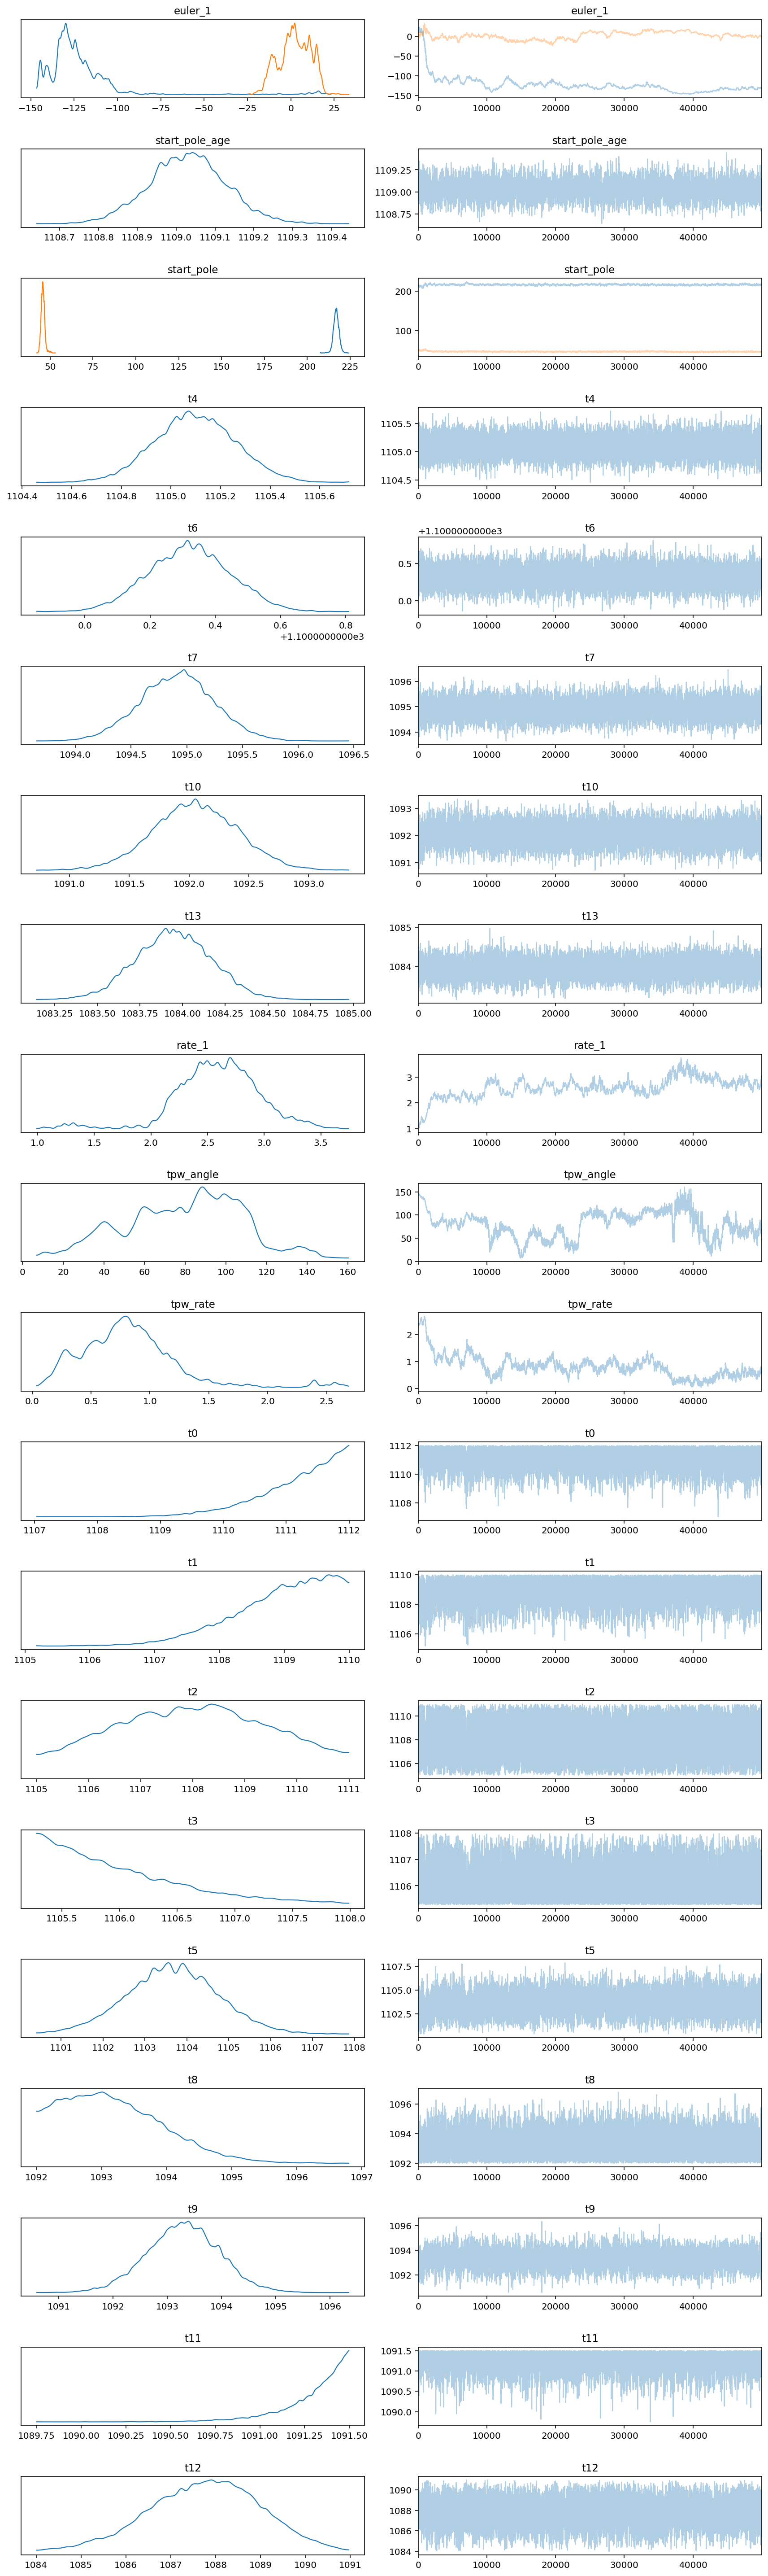

In [10]:
# plt.figure(figsize=(10, 20))
axes = az.plot_trace(trace_1e_tpw_saved, compact=1)
plt.tight_layout()
# plt.savefig('code_output/kewee_1_euler_inversion_traceplot.pdf', bbox_inches='tight')

In [12]:
pm.save_trace(trace_1e_tpw, 'code_output/kewee_1_euler_tpw_trace', overwrite=1)

'code_output/kewee_1_euler_tpw_trace'

In [13]:
trace_1e_saved = pm.load_trace('code_output/kewee_1_euler_tpw_trace', model)

In [14]:
one_euler_tpw_df = pm.trace_to_dataframe(trace_1e_saved)

In [19]:
one_euler_tpw_df.columns

Index(['euler_1__0', 'euler_1__1', 'start_pole_age', 'start_pole__0',
       'start_pole__1', 't4', 't6', 't7', 't10', 't13', 'rate_1', 'tpw_angle',
       'tpw_rate', 't0', 't1', 't2', 't3', 't5', 't8', 't9', 't11', 't12',
       't14', 't15'],
      dtype='object')

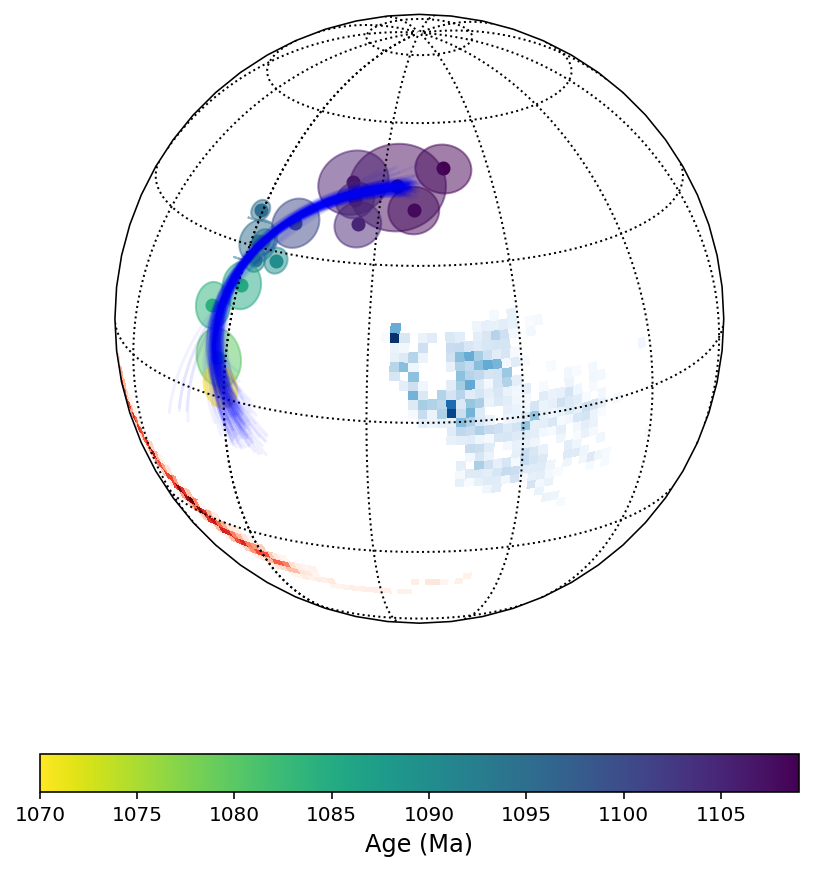

In [15]:
one_euler_tpw_posterior_likelihood_list = plot_trace_1e_tpw(trace_1e_tpw_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(),
                  220, 20, 200,
                  savefig = 0, scatter=0, posterior_n=1000, figname='code_output/kewee_1_Euler_tpw_inversion_.pdf')

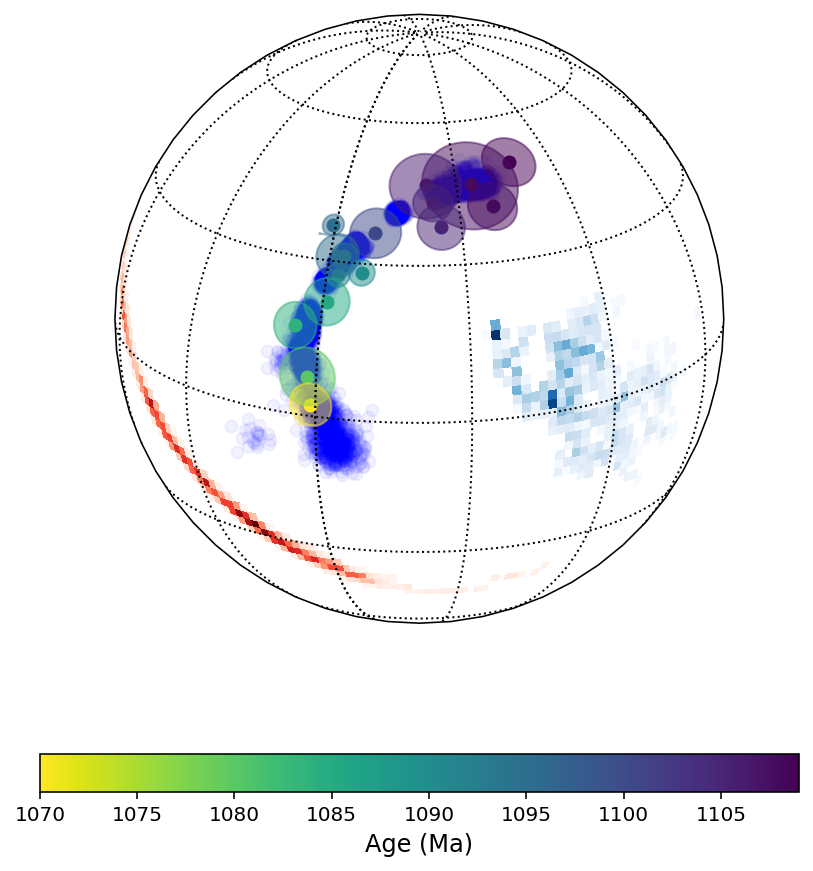

In [18]:
one_euler_tpw_posterior_likelihood_list = plot_trace_1e_tpw(trace_1e_tpw_saved, Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(),
                  200, 20, 200,
                  savefig = 0, scatter=1, posterior_n=1000, figname='code_output/kewee_1_Euler_tpw_inversion_.pdf')

<AxesSubplot:xlabel='rate_1', ylabel='Count'>

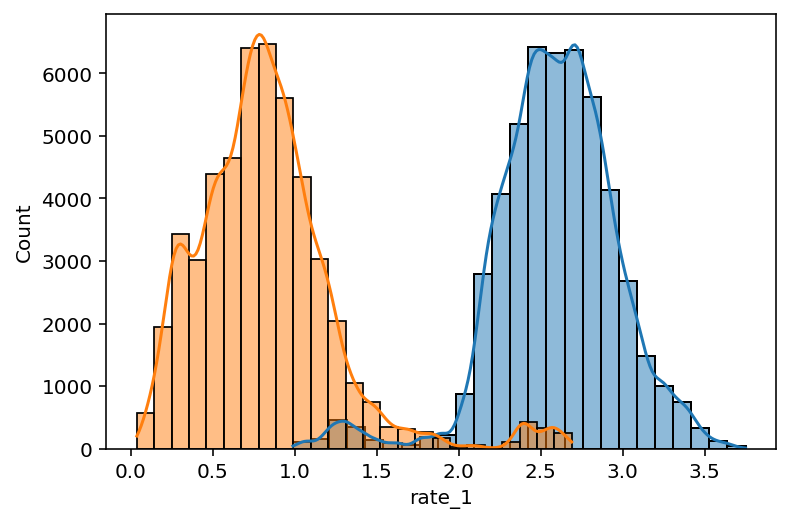

In [23]:
sns.histplot(one_euler_tpw_df['rate_1'], bins=25, kde=1, color='C0')
sns.histplot(one_euler_tpw_df['tpw_rate'], bins=25, kde=1, color='C1')

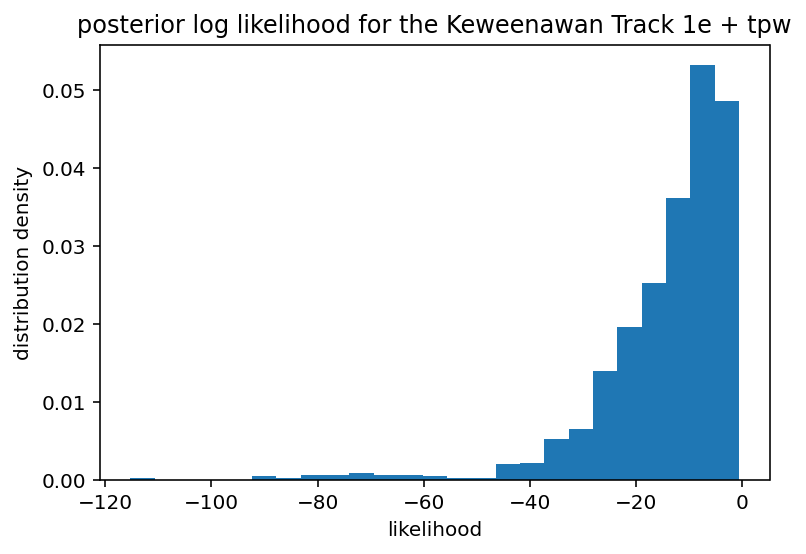

In [17]:
plt.hist(one_euler_tpw_posterior_likelihood_list, density=1, bins=25)
plt.title('posterior log likelihood for the Keweenawan Track 1e + tpw')
plt.ylabel('distribution density')
plt.xlabel('likelihood')
plt.show()

## 2 euler + tpw inversion

starting pole age is:  1109.0
starting pole lon/lat: [227.0, 49.5] starting pole k:  697.7572089711642
pole 0 age:  1109.0
pole 1 age:  1108.0
pole 2 age:  1108.0
pole 3 age:  1106.0
pole 4 age:  1105.15
pole 5 age:  1105.0
pole 6 age:  1100.36
pole 7 age:  1095.01
pole 8 age:  1095.0
pole 9 age:  1094.0
pole 10 age:  1092.51
pole 11 age:  1090.0
pole 12 age:  1085.47
pole 13 age:  1083.95
pole 14 age:  1080.0
pole 15 age:  1070.0


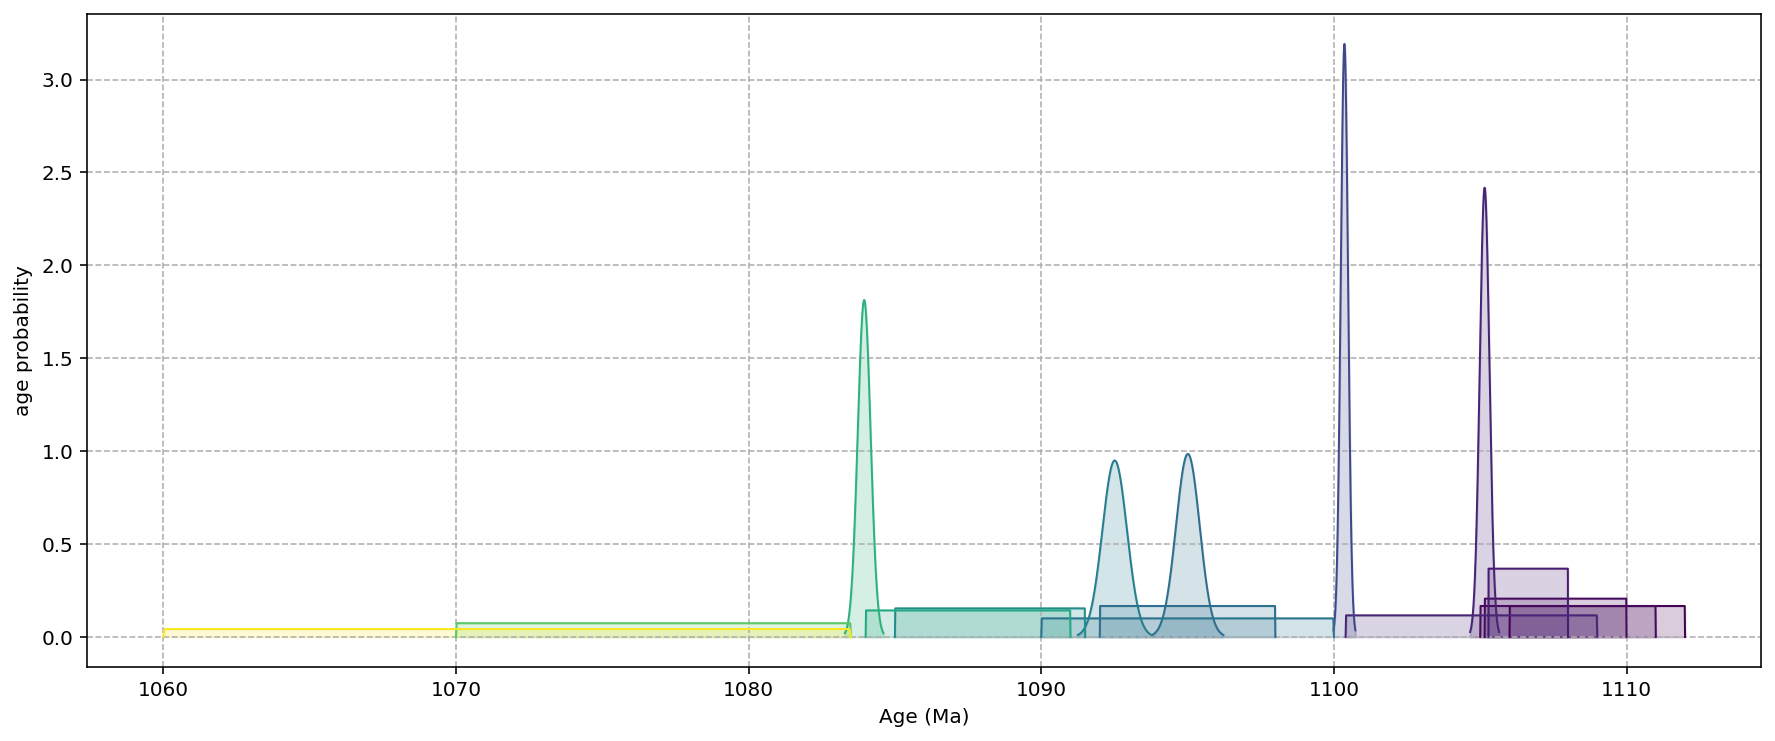

In [32]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [0.,0.], k = -.1, testval = np.array([1., 1.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    euler_2 = Watson_Girdle('euler_2', lon_lat = [0.,0.], k = -.1, testval = np.array([1., 1.]), shape = 2)
    rate_2 = pm.Uniform('rate_2', 0, 4) 
    
    start_index = Kewee_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Kewee_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Kewee_poles['AgeNominal'].max()))
    
    start_lon_lat = [Kewee_poles['PLon'].tolist()[start_index], Kewee_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    tpw_angle = pm.Uniform('tpw_angle', 0., 360.)
    tpw_rate = pm.Exponential('tpw_rate', 2.5)
    
    switchpoint = pm.Uniform('switchpoint', Kewee_poles['AgeNominal'].min(), Kewee_poles['AgeNominal'].max())
    
    plt.figure(figsize = (15, 6))
    plt.ylabel('age probability')
    plt.xlabel('Age (Ma)')
    for i in range(Kewee_poles.shape[0]):
        
        max_y = 0
        if Kewee_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i])
            x = np.linspace(Kewee_poles['AgeLower'][i], Kewee_poles['AgeUpper'][i], 500)
            y = np.zeros(500)
            y[(x< Kewee_poles['AgeUpper'][i]) & (x>Kewee_poles['AgeLower'][i])] = 1.0/(Kewee_poles['AgeUpper'][i]-Kewee_poles['AgeLower'][i])

            if max_y < max(y):
                max_y = max(y)
            
        else: 
            age = pm.Normal('t'+str(i), mu=Kewee_poles['AgeNominal'][i], sigma = Kewee_poles['Gaussian_2sigma'][i]/2)
            mu = Kewee_poles['AgeNominal'][i]
            sigma = Kewee_poles['Gaussian_2sigma'][i]/2

            x = np.linspace(mu-3*sigma,mu+3*sigma, 1000)
            y = st.norm.pdf(x, mu, sigma)
            if max_y < max(y):
                max_y = max(y)
        plt.plot(x, y, color = Kewee_poles['color'][i], lw=1)
        plt.fill_between(x, y, color = Kewee_poles['color'][i], alpha = 0.2)
        plt.grid(1, ls='--')
        print('pole '+str(i)+' age: ',Kewee_poles['AgeNominal'][i])
        
        lon_lat = pole_position_2e_tpw(start, euler_1, rate_1, euler_2, rate_2, tpw_angle, tpw_rate, switchpoint, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Kewee_poles['A95'].tolist()[i]), 
                            observed=[Kewee_poles['PLon'].tolist()[i], Kewee_poles['PLat'].tolist()[i]])
        
        
    # trace_2e_tpw = pm.sample(20000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

In [33]:
# pm.save_trace(trace_2e_tpw, 'code_output/kewee_2_euler_tpw_trace', overwrite=1)

In [34]:
trace_2e_tpw_saved = pm.load_trace('code_output/kewee_2_euler_tpw_trace', model)

In [35]:
# plt.figure(figsize=(10, 20))
# axes = pm.traceplot(trace_2e_tpw_saved, compact=1)
# plt.subplots_adjust(hspace = 1 )
# plt.savefig('code_output/kewee_2_euler_tpw_inversion_traceplot.pdf', bbox_inches='tight')

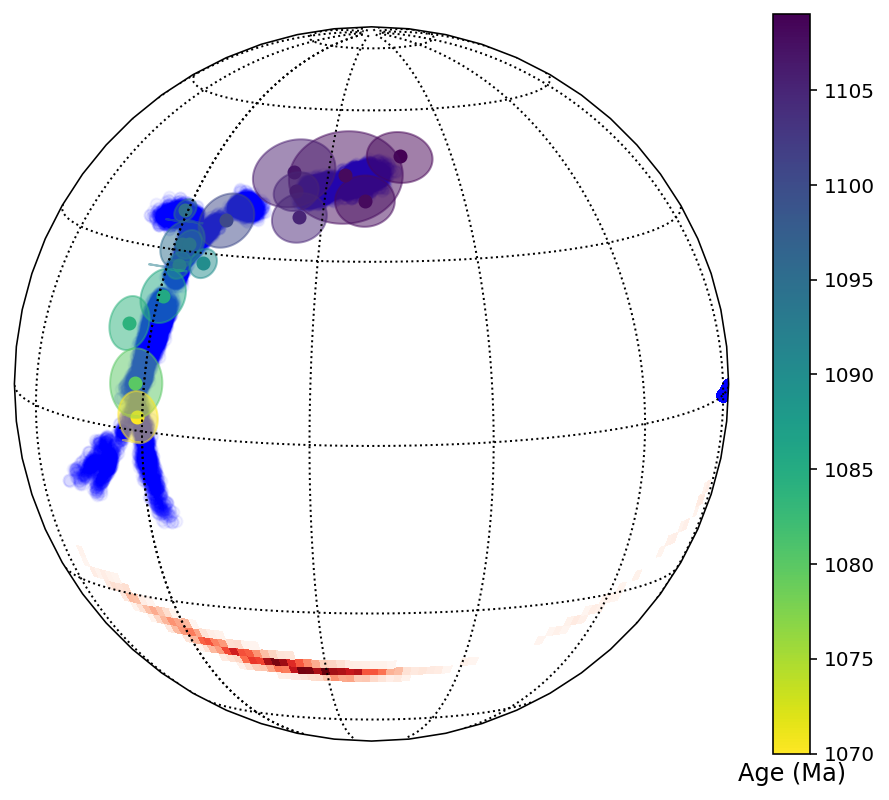

In [36]:
posterior_likelihood_2e_tpw = plot_trace_2e_tpw(trace_2e_tpw_saved[10000:], Kewee_poles[['PLon', 'PLat']].to_numpy(), Kewee_poles['A95'], Kewee_poles['AgeNominal'].tolist(),
                  220, 10, 100, 
                  savefig = 0, scatter=1, posterior_n=2000, figname='code_output/kewee_2_Euler_tpw_inversion_.pdf');

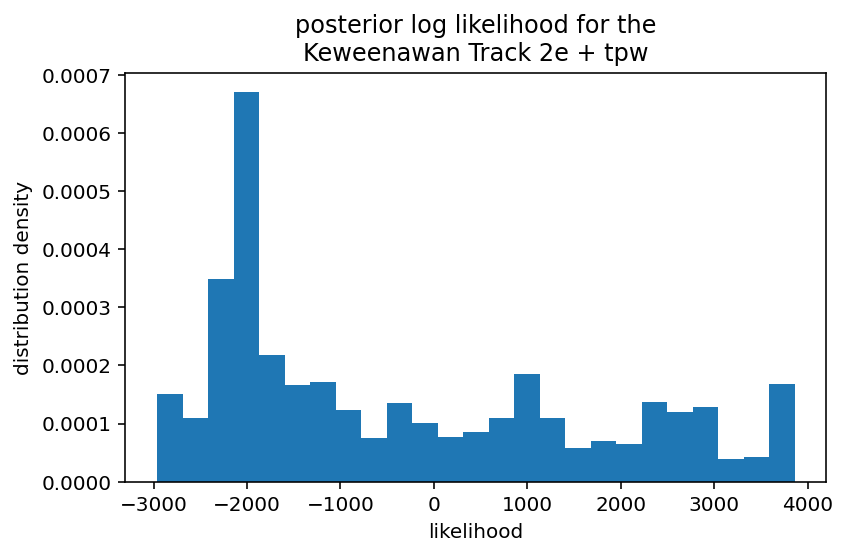

In [46]:
plt.hist(posterior_likelihood_2e_tpw, density=1, bins=25)
plt.title('posterior log likelihood for the\nKeweenawan Track 2e + tpw')
plt.ylabel('distribution density')
plt.xlabel('likelihood')
plt.tight_layout()
plt.show()